In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dia=pd.read_csv('diamonds.csv',index_col=0)

In [3]:
dia.info()
dia.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
dia.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
non_cols=['cut','color','clarity']
dia_num=dia.drop(non_cols,axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81b7bed358>,
      dtype=object)

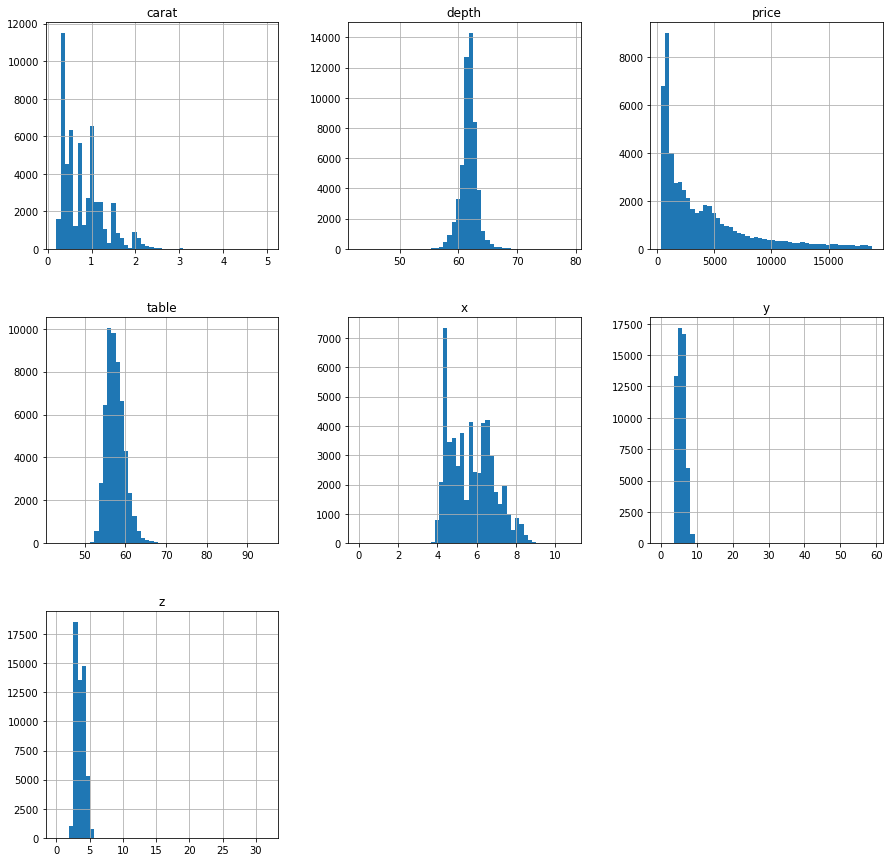

In [6]:
dia_num.hist(bins=50,figsize=(15,15))

In [7]:
from sklearn.preprocessing import LabelBinarizer
enc=LabelBinarizer()#sparse_output=True)
non_dia=[]
for col in non_cols:
   non_dia.append(enc.fit_transform(dia[col]))

In [8]:
non_dia

[array([[0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0]]), array([[0, 1, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [9]:
dia['price']

1         326
2         326
3         327
4         334
5         335
6         336
7         336
8         337
9         337
10        338
11        339
12        340
13        342
14        344
15        345
16        345
17        348
18        351
19        351
20        351
21        351
22        352
23        353
24        353
25        353
26        354
27        355
28        357
29        357
30        357
         ... 
53911    2753
53912    2753
53913    2753
53914    2753
53915    2753
53916    2753
53917    2753
53918    2753
53919    2753
53920    2753
53921    2755
53922    2755
53923    2755
53924    2756
53925    2756
53926    2756
53927    2756
53928    2756
53929    2756
53930    2756
53931    2756
53932    2756
53933    2757
53934    2757
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
53940    2757
Name: price, Length: 53940, dtype: int64

z


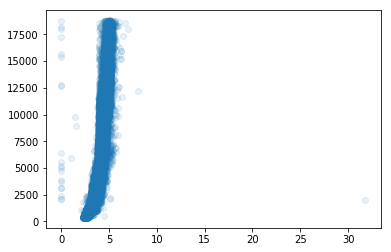

table


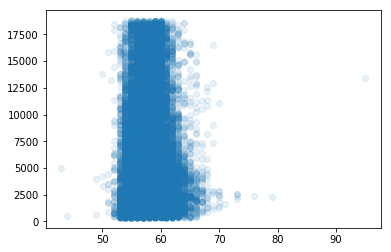

depth


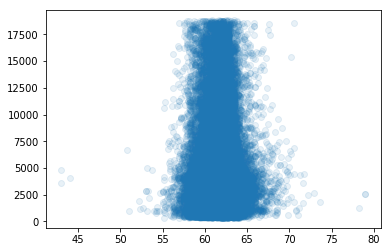

x


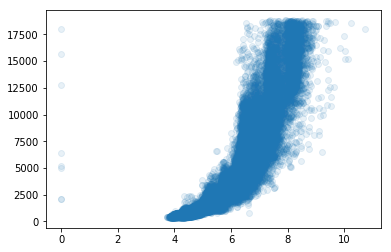

y


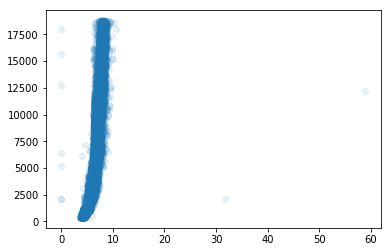

carat


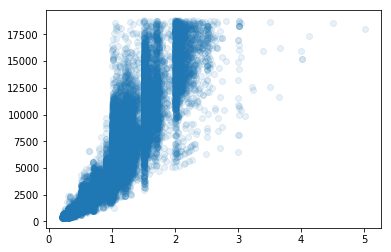

In [10]:
plt.figure()
for i in list((set(dia.columns)-set(non_cols))-set(['price'])):
    plt.scatter(dia[i],dia['price'],alpha=0.1)
    print(i)
    plt.show()


In [11]:
cor=dia.corr()
cor['price']

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

In [12]:
dia_needed=['carat','x','y','z']

In [13]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(dia[dia_needed],dia['price'],test_size=0.2,shuffle=True)

In [14]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
print('intercept=',reg.intercept_)

print('......coef=',reg.coef_)



intercept= 2040.2215484637236
......coef= [10340.82550519 -1310.12140462   515.31692699  -509.0447817 ]


In [15]:
y_pred=reg.predict(X_test)
y_pred

array([ 331.50990619, 5235.11780369, 3411.67993748, ..., 1527.33348329,
       9504.03652828, 7204.96856997])

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('mae=',mean_absolute_error(y_test,y_pred))
print('mse=',mean_squared_error(y_test,y_pred))
print('rmse=',mean_squared_error(y_test,y_pred)**(1/2))
print('r2score=',r2_score(y_test,y_pred))

mae= 901.9902692997223
mse= 2389676.4144048276
rmse= 1545.857824770709
r2score= 0.8497063152749339
